# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import absolute
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Data

In [2]:
weekly_DMC=pd.read_csv("weekly_DMC.csv")
weekly_DMC.set_index(["DATE"],inplace=True)

In [3]:
y=weekly_DMC.pop("Drought_Level")
x=weekly_DMC[["AWND","PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [4]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [5]:
train_X_norm=preprocessing.normalize(train_X)
test_X_norm=preprocessing.normalize(test_X)

# Models

In [6]:
kf = KFold(n_splits=5)

# Logistic Regression

In [7]:
M1_Score = cross_val_score(LogisticRegression(), train_X_norm, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M1_Score}')
print(mean(absolute(M1_Score)))

Scores for each fold are: [0.42777778 0.48888889 0.85555556 0.47222222 0.70391061]
0.5896710117939168


In [8]:
M1= LogisticRegression()
M1.fit(train_X_norm,train_Y)

LogisticRegression()

In [9]:
M1_prediction=M1.predict(test_X_norm)

In [10]:
ACC_1=accuracy_score(test_Y,M1_prediction)
print("Accuracy Score: %.2f" % ACC_1)
print(classification_report(test_Y,M1_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.70
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       209
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        16

    accuracy                           0.70       300
   macro avg       0.17      0.25      0.21       300
weighted avg       0.49      0.70      0.57       300



C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# k-Nearest Neighbors

In [11]:
M2_Score = cross_val_score(KNeighborsClassifier(n_neighbors=17), train_X_norm, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M2_Score}')
print(mean(absolute(M2_Score)))

Scores for each fold are: [0.43333333 0.48888889 0.85       0.46111111 0.69273743]
0.5852141527001862


In [12]:
M2=KNeighborsClassifier(n_neighbors=17)
M2.fit(train_X_norm,train_Y)

KNeighborsClassifier(n_neighbors=17)

In [13]:
M2_prediction=M2.predict(test_X_norm)

In [14]:
ACC_2=accuracy_score(test_Y,M2_prediction)
print("Accuracy Score: %.2f" % ACC_2)
print(classification_report(test_Y,M2_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.69
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       209
           1       0.20      0.02      0.04        46
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        16

    accuracy                           0.69       300
   macro avg       0.23      0.25      0.22       300
weighted avg       0.52      0.69      0.58       300



C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Trees

In [15]:
M3_score = cross_val_score(DecisionTreeClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M3_score}')
print(mean(absolute(M3_score)))

Scores for each fold are: [0.37777778 0.34444444 0.42222222 0.31666667 0.46927374]
0.38607697082557413


In [16]:
M3=DecisionTreeClassifier()
M3.fit(train_X,train_Y)

DecisionTreeClassifier()

In [17]:
M3_prediction=M3.predict(test_X)

In [18]:
ACC_3=accuracy_score(test_Y,M3_prediction)
print("Accuracy Score: %.2f" % ACC_3)
print(classification_report(test_Y,M3_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.50
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       209
           1       0.16      0.20      0.17        46
           2       0.11      0.10      0.11        29
           3       0.06      0.06      0.06        16

   micro avg       0.52      0.50      0.51       300
   macro avg       0.27      0.25      0.26       300
weighted avg       0.55      0.50      0.52       300



# Random Forest

In [19]:
M4_score = cross_val_score(RandomForestClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M4_score}')
print(mean(absolute(M4_score)))

Scores for each fold are: [0.44444444 0.47777778 0.71111111 0.46111111 0.64804469]
0.548497827436375


In [20]:
M4=RandomForestClassifier()
M4.fit(train_X,train_Y)

RandomForestClassifier()

In [21]:
M4_prediction=M4.predict(test_X)

In [22]:
ACC_4=accuracy_score(test_Y,M4_prediction)
print("Accuracy Score: %.2f" % ACC_4)
print(classification_report(test_Y,M4_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.67
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       209
           1       0.26      0.11      0.15        46
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        16

    accuracy                           0.67       300
   macro avg       0.24      0.26      0.24       300
weighted avg       0.53      0.67      0.59       300



C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluations

In [23]:
summary = pd.DataFrame({'Type':['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree','Random Forest'],
                   'Accuracy Score':[ACC_1, ACC_2, ACC_3, ACC_4]})
summary

,Type,Accuracy Score
0,Logistic Regression,0.696667
1,k-Nearest Neighbors,0.693333
2,Decision Tree,0.496667
3,Random Forest,0.673333


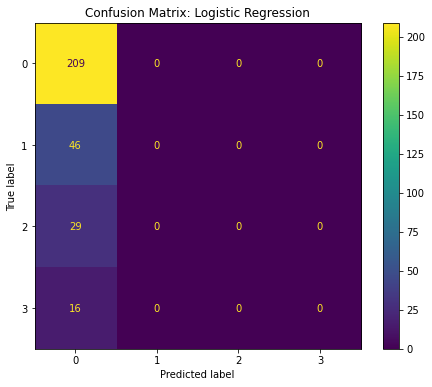

In [24]:
confusion_matrix = metrics.confusion_matrix(test_Y, M1_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Logistic Regression')
cm_display.plot(ax=ax)
plt.show()

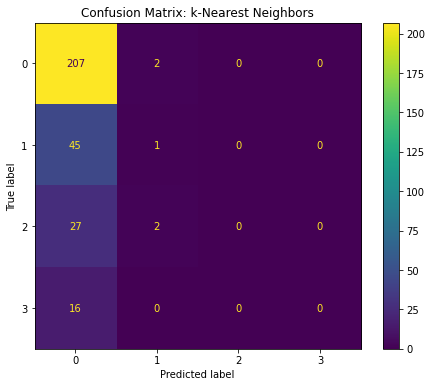

In [25]:
confusion_matrix = metrics.confusion_matrix(test_Y, M2_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: k-Nearest Neighbors')
cm_display.plot(ax=ax)
plt.show()

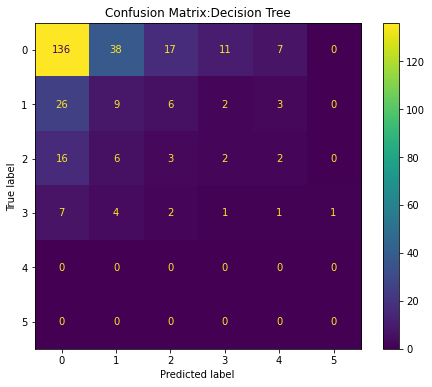

In [26]:
confusion_matrix = metrics.confusion_matrix(test_Y, M3_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix:Decision Tree')
cm_display.plot(ax=ax)
plt.show()

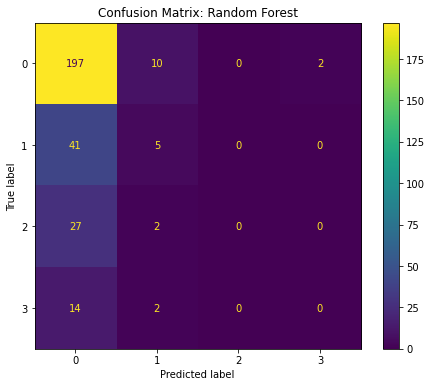

In [27]:
confusion_matrix = metrics.confusion_matrix(test_Y, M4_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Random Forest')
cm_display.plot(ax=ax)
plt.show()